# **Libraries**

In [ ]:
! pip install gymnasium[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━

# **Taxi-v3**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

In [ ]:
def value_iteration(env, gamma=0.9, epsilon=1e-2, max_iterations=500000, plot_convergence=True):
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    V = np.zeros(n_states)
    history = []
    iteration = 0

    for i in range(max_iterations):
        delta = 0
        V_old = V.copy()
        for s in range(n_states):
            v = V[s]
            q_sa = []

            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    q += prob * (reward + gamma * V_old[next_state])
                q_sa.append(q)

            V[s] = max(q_sa)
            delta = max(delta, abs(v - V[s]))
            history.append(V.copy())

        iteration += 1
        if delta < epsilon:
            break

    # Compute the optimal policy from the final V
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_sa = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                q_sa[a] += prob * (reward + gamma * V[next_state])
        policy[s] = np.argmax(q_sa)

    # Plot convergence graph
    if plot_convergence:
        V_star = V.copy()
        l2_diffs = [np.linalg.norm(V_step - V_star) for V_step in history]

        plt.figure(figsize=(10, 5))
        plt.plot(l2_diffs)
        plt.xlabel('Number of V(s) updates')
        plt.ylabel(r'$||V - V^*||_2$')
        plt.title('Value Iteration Convergence')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return V, policy, iteration

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


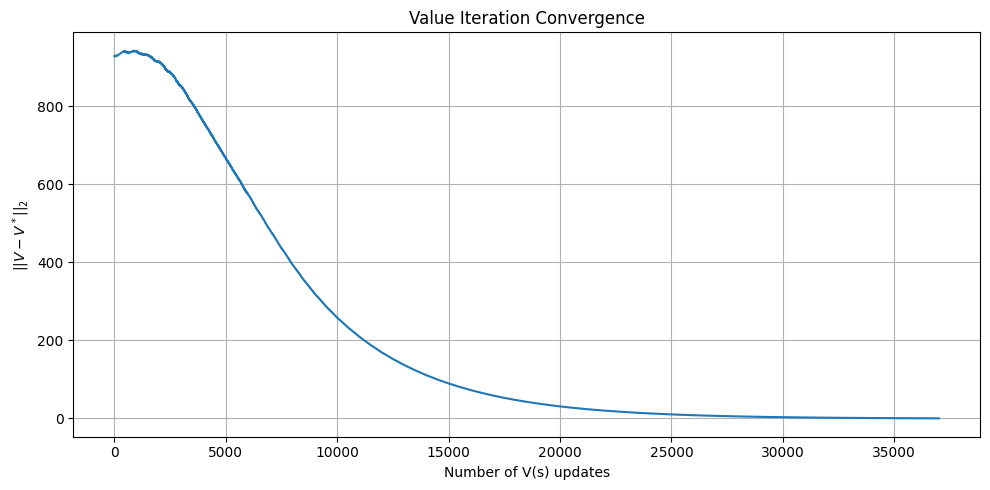


Converged in 74 iterations.


In [ ]:
env = gym.make("Taxi-v3")
V_star, optimal_policy, total_iterations = value_iteration(env)

print()
print(f"Converged in {total_iterations} iterations.")

In [ ]:
np.save("V_star_taxi.npy", V_star)

In [ ]:
def gauss_seidel_value_iteration(env, V_star, gamma=0.9, epsilon=1e-2, max_iterations=500000, plot_convergence=True):
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    V = np.zeros(n_states)
    history = []
    iteration = 0

    for i in range(max_iterations):
        delta = 0
        for s in range(n_states):
            v = V[s]
            q_sa = []

            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_sa.append(q)

            V[s] = max(q_sa)
            delta = max(delta, abs(v - V[s]))
            history.append(V.copy())

        iteration += 1
        if delta < epsilon:
            break

    if plot_convergence:
        l2_diffs = [np.linalg.norm(V_step - V_star) for V_step in history]

        plt.figure(figsize=(10, 5))
        plt.plot(l2_diffs)
        plt.xlabel("Number of V(s) updates")
        plt.ylabel(r"$||V - V^*||_2$")
        plt.title("Gauss-Seidel Value Iteration Convergence")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return V, iteration


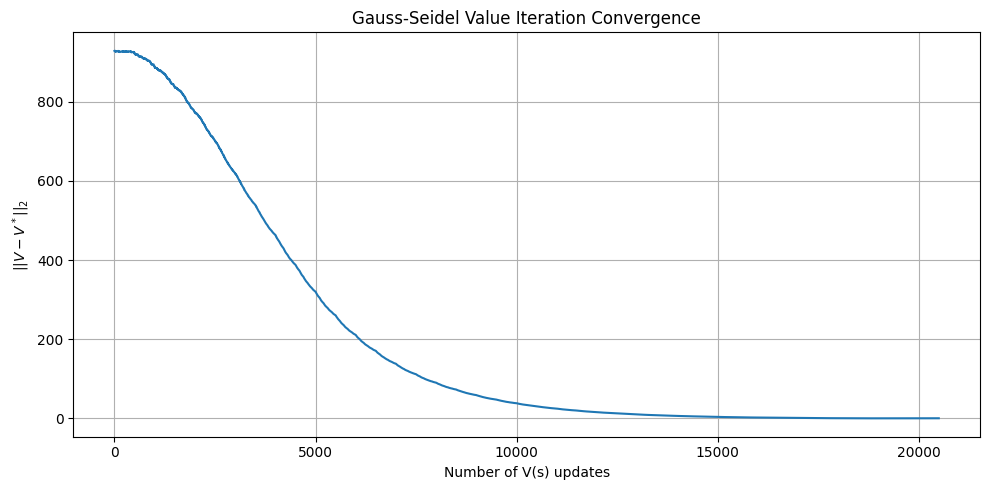


Gauss-Seidel converged in 41 iterations.


In [ ]:
env = gym.make("Taxi-v3")
V_star = np.load("V_star_taxi.npy")

V_gs, iter_gs = gauss_seidel_value_iteration(env, V_star)

print()
print(f"Gauss-Seidel converged in {iter_gs} iterations.")

In [ ]:
def prioritized_sweeping_value_iteration(env, V_star, gamma=0.9, epsilon=1e-2,
                                         theta=1e-4, max_iterations=500000,
                                         plot_convergence=True):
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    V = np.zeros(n_states)
    updates = 0
    l2_diffs = []
    in_queue = set()
    predecessors = defaultdict(set)

    # Step 1: Build predecessors map
    for s in range(n_states):
        for a in range(n_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                if prob > 0:
                    predecessors[next_state].add(s)

    # Step 2: Initialize priority queue with states with large Bellman error
    priority_queue = []
    for s in range(n_states):
        q_sa = [
            sum(prob * (reward + gamma * V[next_state])
                for prob, next_state, reward, done in env.P[s][a])
            for a in range(n_actions)
        ]
        max_q = max(q_sa)
        diff = abs(V[s] - max_q)
        if diff > theta:
            heapq.heappush(priority_queue, (-diff, s))
            in_queue.add(s)

    # Step 3: Prioritized Sweeping loop
    while priority_queue and updates < max_iterations:
        _, s = heapq.heappop(priority_queue)
        in_queue.discard(s)

        v_old = V[s]
        q_sa = [
            sum(prob * (reward + gamma * V[next_state])
                for prob, next_state, reward, done in env.P[s][a])
            for a in range(n_actions)
        ]
        V[s] = max(q_sa)
        delta = abs(v_old - V[s])
        updates += 1

        # Track L2 convergence to V_star every N updates
        if plot_convergence:
            l2_diffs.append(np.linalg.norm(V - V_star))

        # Convergence condition
        if delta < epsilon:
            break

        # Update predecessors
        for p in predecessors[s]:
            if p in in_queue:
                continue
            q_sa_p = [
                sum(prob * (reward + gamma * V[next_state])
                    for prob, next_state, reward, done in env.P[p][a])
                for a in range(n_actions)
            ]
            max_q_p = max(q_sa_p)
            diff_p = abs(V[p] - max_q_p)
            if diff_p > theta:
                heapq.heappush(priority_queue, (-diff_p, p))
                in_queue.add(p)

    # Plot convergence
    if plot_convergence and l2_diffs:
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(len(l2_diffs)) * 100, l2_diffs)
        plt.xlabel("Number of V(s) updates")
        plt.ylabel(r"$||V - V^*||_2$")
        plt.title("Prioritized Sweeping Value Iteration Convergence")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return V, updates

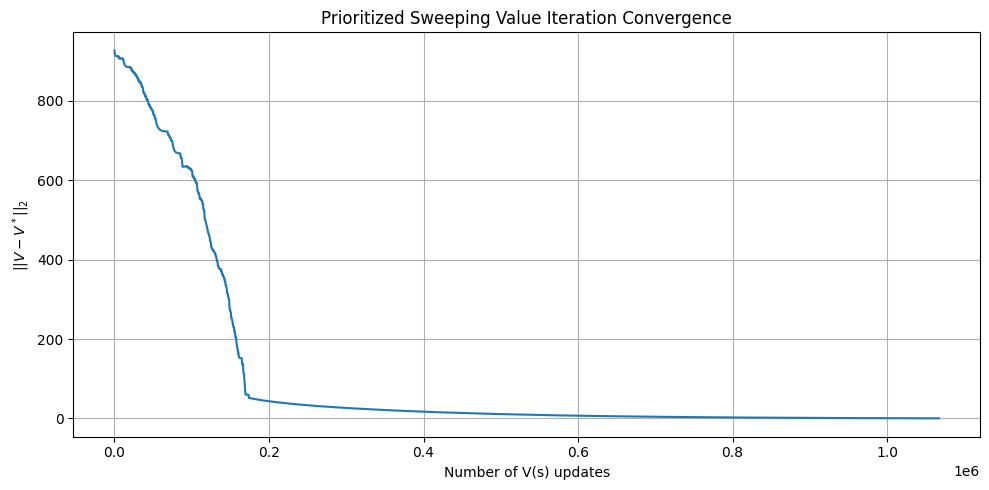

Prioritized Sweeping converged in 10670 updates.


In [ ]:
env = gym.make("Taxi-v3")
V_star = np.load("V_star_taxi.npy")

V_ps, updates_ps = prioritized_sweeping_value_iteration(env, V_star)
print(f"Prioritized Sweeping converged in {updates_ps} updates.")

In [ ]:
def policy_iteration(env, V_star, gamma=0.9, epsilon=1e-2, max_iterations=500000, plot_convergence=True):
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    policy = np.random.randint(n_actions, size=n_states)
    V = np.zeros(n_states)
    history = []
    updates = 0
    improvement_steps = []

    while updates < max_iterations:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(n_states):
                v = V[s]
                a = policy[s]
                v_new = sum(prob * (reward + gamma * V[next_state])
                            for prob, next_state, reward, done in env.P[s][a])
                V[s] = v_new
                delta = max(delta, abs(v - V[s]))
                history.append(V.copy())
                updates += 1
                if updates >= max_iterations:
                    break
            if delta < epsilon or updates >= max_iterations:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            q_sa = np.zeros(n_actions)
            for a in range(n_actions):
                q_sa[a] = sum(prob * (reward + gamma * V[next_state])
                              for prob, next_state, reward, done in env.P[s][a])
            best_action = np.argmax(q_sa)
            if old_action != best_action:
                policy[s] = best_action
                policy_stable = False

        # Marchează momentul de policy improvement
        improvement_steps.append(len(history))

        if policy_stable:
            break

    # Plot convergence graph
    if plot_convergence:
        l2_diffs = [np.linalg.norm(V_step - V_star) for V_step in history]
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(len(l2_diffs)), l2_diffs, label="||V - V*||₂")

        for step in improvement_steps:
            plt.axvline(x=step, color='red', linestyle='--', alpha=0.5)

        plt.xlabel("Number of V(s) updates")
        plt.ylabel(r"$||V - V^*||_2$")
        plt.title("Policy Iteration Convergence with Improvement Steps")
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

    return V, policy, updates


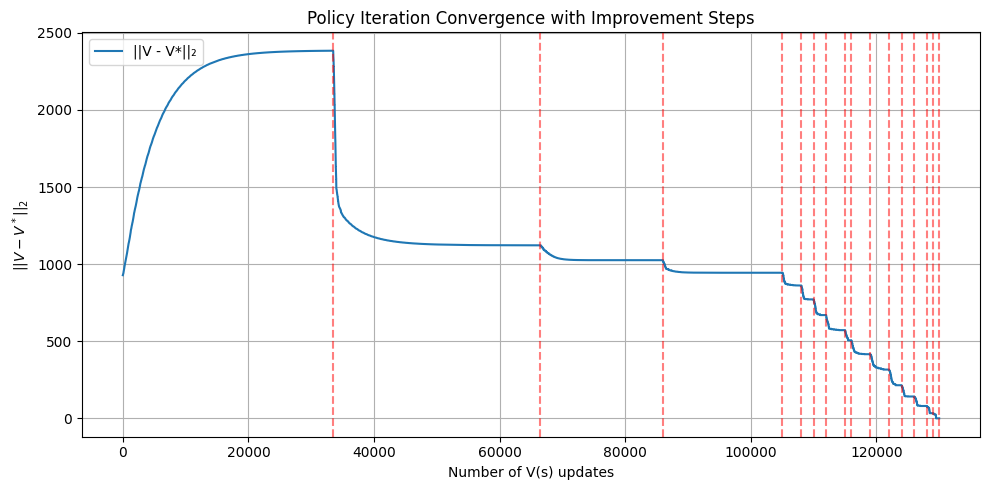

Policy Iteration converged in 130000 iterations.


In [ ]:
env = gym.make("Taxi-v3")
V_star = np.load("V_star_taxi.npy")

V_pi, policy_pi, iterations_pi = policy_iteration(env, V_star)
print(f"Policy Iteration converged in {iterations_pi} iterations.")

In [ ]:
def run_multiple_policy_iterations(env, V_star, runs=5):
    updates_list = []

    for i in range(runs):
        _, _, updates = policy_iteration(env, V_star, plot_convergence=False)
        updates_list.append(updates)
        print(f"Run {i+1}: {updates} V(s) updates")

    avg_updates = np.mean(updates_list)
    print(f"\nAverage number of V(s) updates over {runs} runs: {avg_updates:.2f}")

    return avg_updates, updates_list

In [ ]:
env = gym.make("Taxi-v3")
V_star = np.load("V_star_taxi.npy")

avg_updates, all_updates = run_multiple_policy_iterations(env, V_star)

Run 1: 127000 V(s) updates
Run 2: 109000 V(s) updates
Run 3: 111000 V(s) updates
Run 4: 107500 V(s) updates
Run 5: 126000 V(s) updates

Average number of V(s) updates over 5 runs: 116100.00


# **FrozenLake-v1**

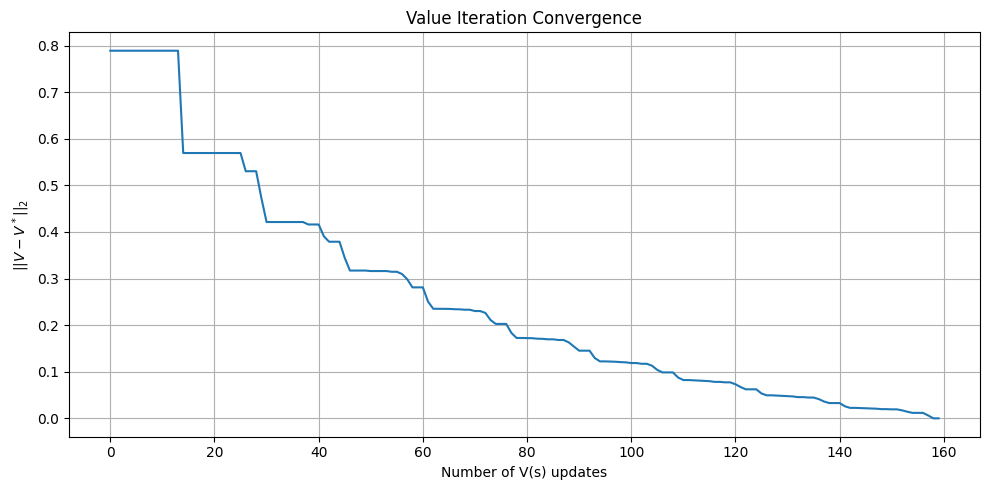


Converged in 10 iterations.


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
V_star, optimal_policy, total_iterations = value_iteration(env)

print()
print(f"Converged in {total_iterations} iterations.")

In [ ]:
np.save("V_star_frozen_lake.npy", V_star)

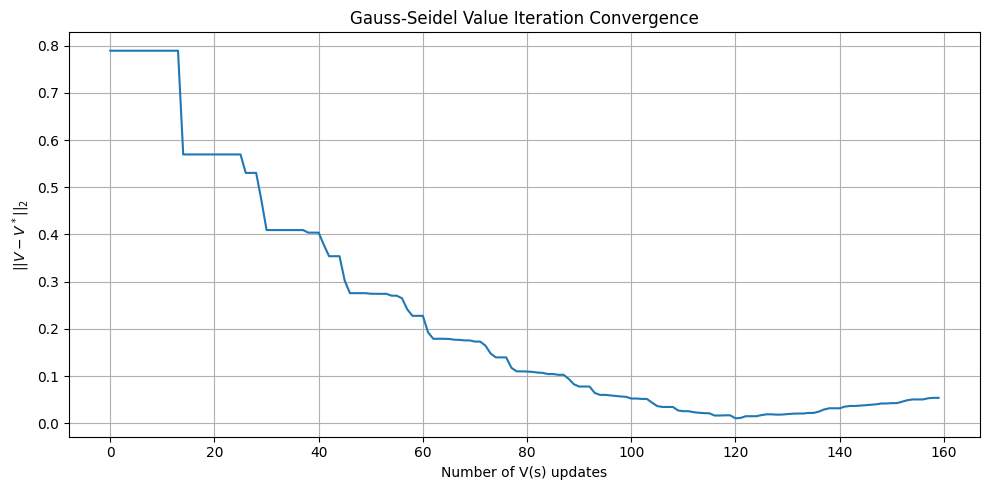


Gauss-Seidel converged in 10 iterations.


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
V_star = np.load("V_star_frozen_lake.npy")

V_gs, iter_gs = gauss_seidel_value_iteration(env, V_star)

print()
print(f"Gauss-Seidel converged in {iter_gs} iterations.")

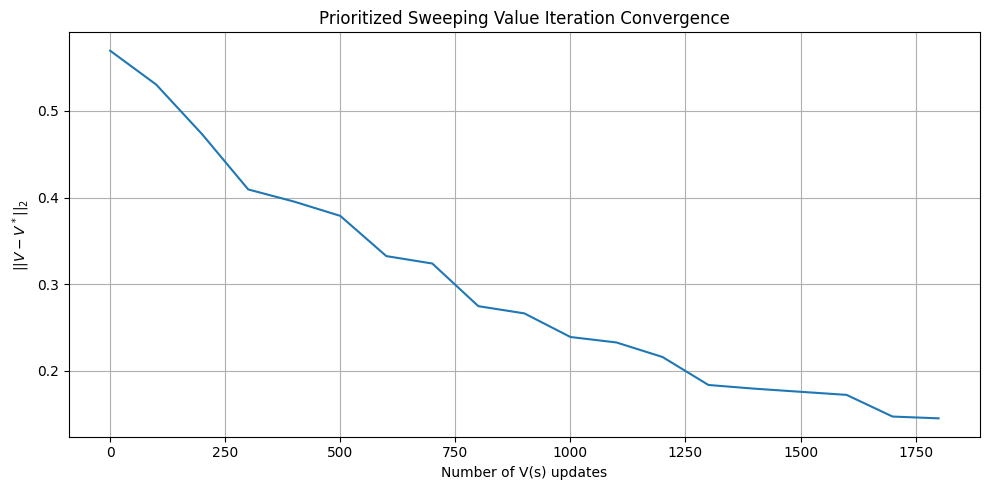

Prioritized Sweeping converged in 19 updates.


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
V_star = np.load("V_star_frozen_lake.npy")

V_ps, updates_ps = prioritized_sweeping_value_iteration(env, V_star, plot_convergence=True)
print(f"Prioritized Sweeping converged in {updates_ps} updates.")

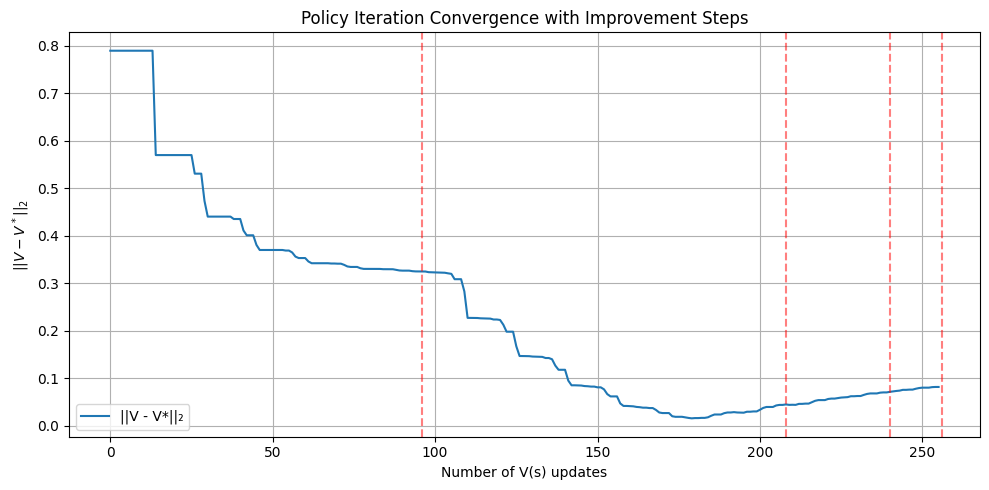

Policy Iteration converged in 256 iterations.


In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
V_star = np.load("V_star_frozen_lake.npy")

V_pi, policy_pi, iterations_pi = policy_iteration(env, V_star)
print(f"Policy Iteration converged in {iterations_pi} iterations.")

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=True)
V_star = np.load("V_star_frozen_lake.npy")

avg_updates, all_updates = run_multiple_policy_iterations(env, V_star)

Run 1: 304 V(s) updates
Run 2: 240 V(s) updates
Run 3: 304 V(s) updates
Run 4: 304 V(s) updates
Run 5: 224 V(s) updates

Average number of V(s) updates over 5 runs: 275.20
